# Pandas Function

# 1. concat

In [8]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3']})
display('df1:', df1)
df2 = pd.DataFrame({'C': ['A4', 'A5', 'A6', 'A7'], 
                    'B': ['B4', 'B5', 'B6', 'B7']})
display('df2:', df2)
  
# concatenating
display('After concatenating:')
display(pd.concat([df1, df2], 
                 axis = 0,ignore_index=True))

'df1:'

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


'df2:'

,C,B
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


'After concatenating:'

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,A2,B2,NaN
3,A3,B3,NaN
4,NaN,B4,A4
5,NaN,B5,A5
6,NaN,B6,A6
7,NaN,B7,A7


In [11]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)
frames = [df1, df2, df3]
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
...,...,...,...,...
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10


In [12]:
#concatination of two dataframes can be done using append also
df1.append([df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
...,...,...,...,...
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10


# 2. Merge

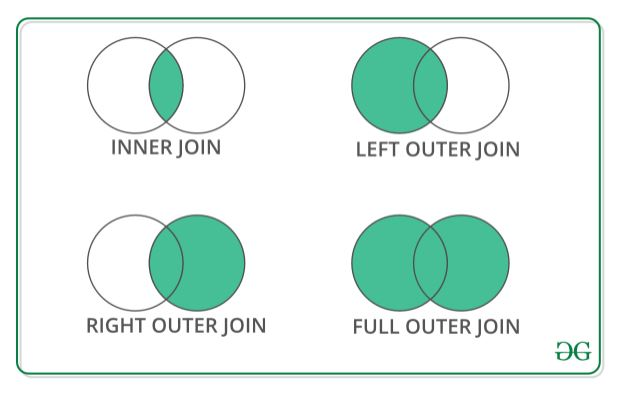

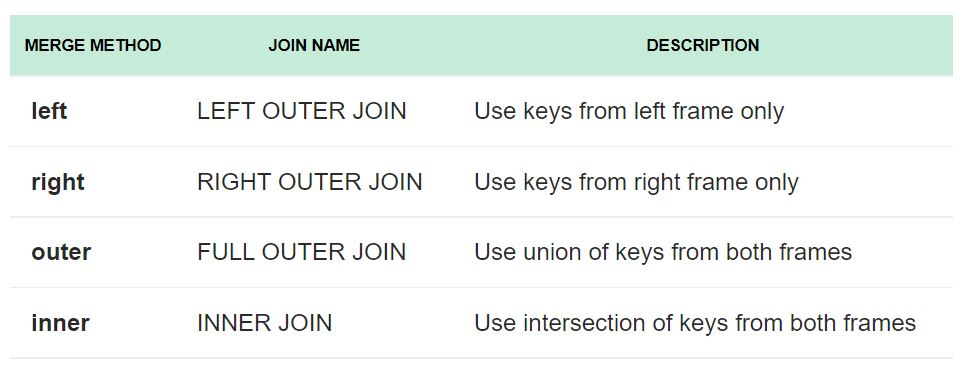

In [13]:
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K1', 'K0', 'K1'],
         'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K0', 'K0', 'K0'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 

In [14]:
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 

In [15]:
df

,key,key1,Name,Age
0,K0,K0,Jai,27
1,K1,K1,Princi,24
2,K2,K0,Gaurav,22
3,K3,K1,Anuj,32


In [16]:
df1

,key,key1,Address,Qualification
0,K0,K0,Nagpur,Btech
1,K1,K0,Kanpur,B.A
2,K2,K0,Allahabad,Bcom
3,K3,K0,Kannuaj,B.hons


In [17]:
# using keys from left frame
res = pd.merge(df, df1, how='left', on=['key', 'key1']) #it will merge values accoring to key and key1 coloums value here
# key and key1  value is same for index 0 and 2 so all the element printed from df and df1. but for index 1 and 3 the value are
#diff so the right dataframe df1 having hull values in output 
res

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27,Nagpur,Btech
1,K1,K1,Princi,24,NaN,NaN
2,K2,K0,Gaurav,22,Allahabad,Bcom
3,K3,K1,Anuj,32,NaN,NaN


In [18]:
res = pd.merge(df, df1, how='right', on=['key', 'key1'])
res

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27.0,Nagpur,Btech
1,K1,K0,NaN,NaN,Kanpur,B.A
2,K2,K0,Gaurav,22.0,Allahabad,Bcom
3,K3,K0,NaN,NaN,Kannuaj,B.hons


In [19]:
# getting union  of keys
res2 = pd.merge(df, df1, how='outer', on=['key', 'key1'])
res2

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27.0,Nagpur,Btech
1,K1,K1,Princi,24.0,NaN,NaN
2,K2,K0,Gaurav,22.0,Allahabad,Bcom
3,K3,K1,Anuj,32.0,NaN,NaN
4,K1,K0,NaN,NaN,Kanpur,B.A
5,K3,K0,NaN,NaN,Kannuaj,B.hons


In [20]:
# getting intersection of keys
res3 = pd.merge(df, df1, how='inner', on=['key', 'key1'])
res3

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27,Nagpur,Btech
1,K2,K0,Gaurav,22,Allahabad,Bcom


# 3.join

In [24]:
# Create data frames
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=['a', 'b', 'c'])
df2 = pd.DataFrame({'C': [7, 8, 9], 'D': [10, 11, 12]}, index=['a', 'd', 'b'])

# Join data frames based on their indexes using inner join
df_join = df1.join(df2, how='inner')
print(df_join)

   A  B  C   D
a  1  4  7  10
b  2  5  9  12


# 4. Melt

In [21]:
d1 = {"Name": ["Pankaj", "Lisa", "David"], "ID": [1, 2, 3], "Role": ["CEO", "Editor", "Author"],"Qualification":["MA","BA","Btech"]}

df = pd.DataFrame(d1)

print(df)

     Name  ID    Role Qualification
0  Pankaj   1     CEO            MA
1    Lisa   2  Editor            BA
2   David   3  Author         Btech


In [27]:
df_melted = pd.melt(df, id_vars=["Name"])
print(df_melted)

     Name       variable   value
0  Pankaj             ID       1
1    Lisa             ID       2
2   David             ID       3
3  Pankaj           Role     CEO
4    Lisa           Role  Editor
5   David           Role  Author
6  Pankaj  Qualification      MA
7    Lisa  Qualification      BA
8   David  Qualification   Btech


In [22]:
df_melted = pd.melt(df, id_vars=["Name"], value_vars=["Qualification", "Role"])
print(df_melted)

     Name       variable   value
0  Pankaj  Qualification      MA
1    Lisa  Qualification      BA
2   David  Qualification   Btech
3  Pankaj           Role     CEO
4    Lisa           Role  Editor
5   David           Role  Author


# 5. Binning

In [23]:
d2= {"Name":["Pankaj","Lisa","David","Virat","Roma"],"percentage":[30,45,70,100,80]}
df = pd.DataFrame(d2)
df

,Name,percentage
0,Pankaj,30
1,Lisa,45
2,David,70
3,Virat,100
4,Roma,80


In [24]:
a=[0,30,50,70,90,100]
grade = ["Fail","Avg","Good","Perfect","Brillient"]
df["grade"]=pd.cut(df["percentage"],bins=a,labels=grade)
df

,Name,percentage,grade
0,Pankaj,30,Fail
1,Lisa,45,Avg
2,David,70,Good
3,Virat,100,Brillient
4,Roma,80,Perfect


In [25]:
bins = [10, 25, 50,90,100]
grade = ["Fail","Average","Good","Brillient"]
df["grade"] = pd.cut(df['percentage'], bins=bins,labels=grade)
print (df)

     Name  percentage      grade
0  Pankaj          30    Average
1    Lisa          45    Average
2   David          70       Good
3   Virat         100  Brillient
4    Roma          80       Good


# 6. Pivot & Pivot Table

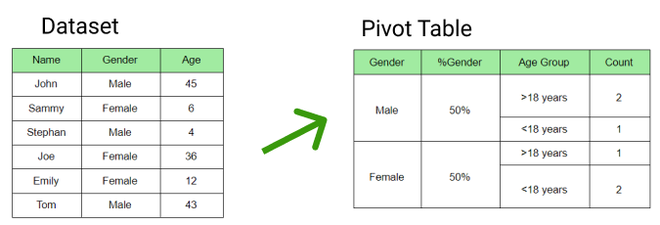

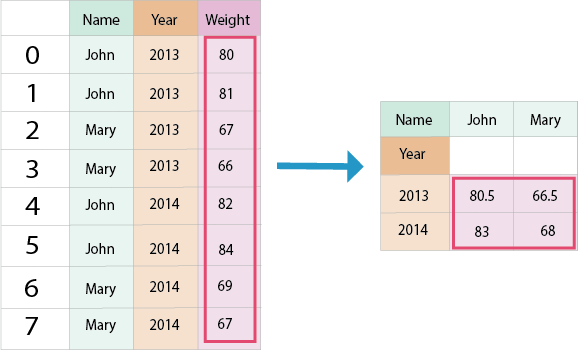

In [26]:
df = pd.read_csv("weather.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [8]:
df.pivot(index='city',columns='date')

temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60

In [9]:
df.pivot(index='city',columns='date',values="humidity")

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


In [27]:
df.pivot(index='date',columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [28]:
df.pivot(index='humidity',columns='city')

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017       NaN       NaN        80.0    NaN      NaN
30        5/2/2017       NaN       NaN        77.0    NaN      NaN
35        5/3/2017       NaN       NaN        79.0    NaN      NaN
56             NaN       NaN  5/1/2017         NaN    NaN     65.0
58             NaN       NaN  5/2/2017         NaN    NaN     66.0
60             NaN       NaN  5/3/2017         NaN    NaN     68.0
80             NaN  5/1/2017       NaN         NaN   75.0      NaN
83             NaN  5/2/2017       NaN         NaN   78.0      NaN
85             NaN  5/3/2017       NaN         NaN   82.0      NaN

In [ ]:
#Create a pivot using aggregate functions


In [29]:
# creating a dataframe
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [30]:
import numpy as np
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)#mean
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

# Covert DataFrame to CSV/Excel

In [31]:
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K1', 'K0', 'K1'],
         'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32],}
data = pd.DataFrame(data1)

In [32]:
data

,key,key1,Name,Age
0,K0,K0,Jai,27
1,K1,K1,Princi,24
2,K2,K0,Gaurav,22
3,K3,K1,Anuj,32


In [33]:
#with index
data.to_csv("New.csv")

In [34]:
#without index
data.to_csv("New1.csv",index =False)

In [ ]:
#covert to excel
#pip install openpyxl

In [35]:
data.to_excel("Himanshu.xlsx",sheet_name="Test")